# Binary star evolution and binary black holes

Authors:
- Bedin Veronica
- Bhatti Roben
- Bonato Diego
- Sapkas Michail

## Theoretical introduction

Since the first detections of gravitational waves (GWs) in 2015 from the LIGO-VIRGO interferometers, a huge effort has been made from the scientific community to understand the processes underlying their emissions. At this time, almost 90 events of GWs have been recorded, more than 80 of which can be associated to **mergers of binary black holes (BBHs)**, which are now considered to be the main sources of these kind of signals.
 The open question of these years is then to understand how these kind of systems formed from their progenitors, which are the **stellar binaries**, in order to actually interpret the detected signal, linking it to their astronomical sources.
 
In our work we studied almost **2 million simulations of binary stellar systems**, carried out with the rapid-synthesis binary population code MOBSE, searching for the **most important features** that determine the eventual evolution of a binary stellar system into a merging BBH, source of GWs.

Before delving into the details of our analysis, we shall now present some key concepts about the so-called **mass transfer** (MT), which is the main phenomenon involved in the evolution of a stellar binary system into an isolated BBH. 
The main way in which MT can happen is via **Roche Lobe Overflow**.
The Roche lobe of a star in a binary system is that equipotential surface passing through the lagrangian point L1, within which the gravity of the star exceeds the one of its companion.

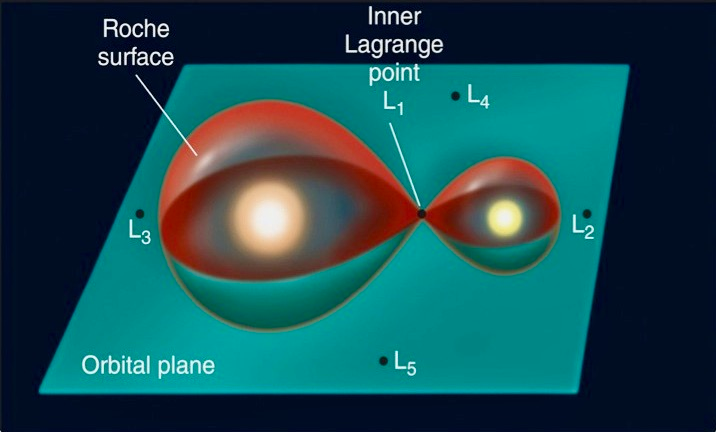

During its evolution, a star can expand beyond its Roche lobe. This will cause the system to undergo a process known as Roche lobe overflow, during which some of the mass of the star (known as donor) is transferred to its companion (the accretor). This process is said to be **stable** if the rate of the mass-transfer is constant, otherwise we say that it’s **unstable** and that the system undergoes a **common envelope** (CE) phase. During this evolutionary stage, the entire binary is surrounded by a single (common) envelope and the nuclei stop corotating with it. Due to friction, some of the angular momentum and orbital energy is converted into internal energy of the envelope.

In the latter case, the evolution of the binary can follow two paths. If the donor doesn’t present a strong **density gradient** between the nucleus and the envelope ( this is the case of a main-seqence star), then the system will merge leaving a single BH, without the emission of GWs. On the other hand, if a **strong gradient** is present, the **envelope can be ejected**, leaving a compact (hardened) binary that will eventually **evolve in a BBH**, that will likely merge via GWs emission. 

The formalism used to describe the physics the CE is the so-called **alpha formalism**. In this kind of description, all the energy necessary to successfully eject the envelope comes from the lost gravitational energy. The efficiency of this conversion is controlled by the **alpha parameter** via the following equation:

$$ \Delta E=\alpha (E_{b,f}-E_{b,i})=\alpha\frac{Gm_{c,1}m_{c,2}}{2}\left(\frac{1}{a_f}-\frac{1}{a_i}\right) $$

where $E_{b,i}$ ($E_{b,f}$) is the orbital binding energy of the two cores before (after) the CE phase, $a_i$ ($a_f$) is the semi-major axis before (after) the CE phase, $m_{c,1}$ and $m_{c,2}$ are the masses of the two cores, and $\alpha$ is a dimensionless parameter that measures which fraction of the removed orbital energy is transferred to the envelope.

A large alpha means that the envelope is easily ejected, while a small alpha means that it takes a lot of energy to be expelled.
There are many uncertainties regarding the exact value of the alpha parameter, depending on the fine details of stellar evolution; in our simulations we considered values  for this parameter ranging from 0.5 to 5 (see the following paragraph for more details).
A value of the alpha parameter different from $\alpha = 1$ can be used to encode other kinds of supplemental energy that contribute to the energy balance of the envelope, such as recombination energy or tidal heating linked to stellar spin.

## Dataset 

The dataframe is stored at this Google Drive [link](https://drive.google.com/drive/folders/1RZGrL6RrKYKaPu0VJ7BQDXptb7B_QOLg).
The compressed file is formed by four folders each one for a different value of the $\alpha$ parameter. Each folder contains a set of simulations for various metalliticies at which the black holes were produced.
From each file we extract the following features:

- Column 0: identifing code of the simulated binary
- Column 1: initial mass (ZAMS mass) of the primary member of the binary system in solar masses ($M_{\odot}$).
- Column 2: initial mass (ZAMS mass) of the secondary member of the binary system ($M_{\odot}$).
- Column 3: mass of the black hole that forms from the primary member ($M_{\odot}$)
- Column 4: mass of the black hole that forms from the secondary member ($M_{\odot}$)
- Column 6: delay time, i.e. time elapsed from the formation of the binary system to the merger of the two black holes (Myr)
- Column 7: semi-major axis of the binary system at the formation of the second- born black hole (in solar radii, $R_{\odot} = 6.95 * 10^{10}$ cm)
- Column 8: orbital eccentricity of the binary system at the formation of the second- born black hole
- Column 21: Boolean variable indicating whether the binary system undergoes a common envelope (True). If column 21 is False, the binary goes via stable mass transfer instead of a common envelope.

We added these extra column:
- Metalliticy
- Alpha

In [36]:
#importing libraries

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# This is the path of the dataset folder. Insert yours to make it work.
path = "C:/Users/micha/Desktop/UNIPD/Laboratory of Computational Physics MODA/Project/stable_MT_vs_CE/"

In [3]:
# Since we need to slice into all the alphas folders and then into the data for each mettalicity we do the following:

# Create a list of the parameters found in the folders and the txt data.
alphas = [0.5, 1, 3, 5]
metallicities = [0.02, 0.002, 0.0002, 0.004, 0.0004, 0.006, 0.008, 0.012, 0.0012, 0.016, 0.0016]

# Create a list with the columns we want to extract from each txt file. 
columns = ['col.0:ID','col.1:m1ZAMS/Msun', 'col.2:m2ZAMS/Msun', 'col.3:m1rem/Msun','col.4:m2rem/Msun',  'col.6:delay_time/Myr', 'col.7:sma/Rsun', 'col.8:ecc', 'col.21:CE']

# Create an empty pandas DataFrame so we can append (concatanate) the data in each txt.
dataset = pd.DataFrame(data=None, columns=columns)



for alpha in alphas:              # Access each folder containing the different metallicity data for each alpha
    for met in metallicities:     # Acess each text containing data for different metallicities
        for txt_file in glob.glob(path+f'A{alpha}/MTCE_BBHs_{met}*'):      # With the use of glob library we access each txt file by creating a path with alpha, metallicity, and the known format.
            
            temp_data = pd.read_csv(txt_file, skiprows=2, header=0, sep=' ')       # load the contents of the txt file, skipping the 2 first rows.
            temp_data = temp_data.loc[:,columns]       # Keep only the relevant columns (given by the project instructions)
            N = len(temp_data)                       # We need the size of the rows in the txt file for the next two lines
            temp_metals = np.ones((N, 1))*met       # We keep the metallicity as a feature, so we need to append it to the data we've just accessed. Not each text has the same amount of data, so we need this step.
            temp_alphas = np.ones((N,1))*alpha      # Same for the alpha
            temp_data['Alpha'] = temp_alphas        #  Append the alpha parameter as a feature
            temp_data['Metallicity'] = temp_metals   # Same for Metallicity
            
            dataset = pd.concat([dataset, temp_data], axis=0, ignore_index=True)     #Finally, append the whole txt we just accessed to the whole dataset.


In [4]:
# Here we rename the columns of the dataset in order to be a little bit more explanatory.

dataset = dataset.rename(columns = {columns[0]:'Binary ID', 
                                    columns[1]:'ZAMS Mass 1 [Msun]' , 
                                    columns[2]:'ZAMS Mass 2 [Msun]', 
                                    columns[3]:'Black Hole Mass 1 [Msun]' , 
                                    columns[4]:'Black Hole Mass 2 [Msun]' , 
                                    columns[5]:'Formation Delay Time [Myrs]' , 
                                    columns[6]:'Semi Major Axis [Rsun]' , 
                                    columns[7]:'Orbital Eccentricity', 
                                    columns[8]:'Formation by Common Envelope'})

In [145]:
# Here we save the whole dataset in a csv format for easy access.

#dataset.to_csv(r"C:\Users\micha\Desktop\UNIPD\Laboratory of Computational Physics MODA\Project\dataset.csv",index=False)

In [6]:
#we have also put the dataset in a dropbox link

In [146]:
url='https://www.dropbox.com/s/ipfb37ojm4vznas/dataset.csv?dl=1'
dataset = pd.read_csv(url)
full_dataset=dataset.copy()
full_dataset

,Binary ID,ZAMS Mass 1 [Msun],ZAMS Mass 2 [Msun],Black Hole Mass 1 [Msun],Black Hole Mass 2 [Msun],Formation Delay Time [Myrs],Semi Major Axis [Rsun],Orbital Eccentricity,Formation by Common Envelope,Alpha,Metallicity
0,0_6942,50.9151,50.8356,4.8001,4.7478,2233.6292,7.9524,0.273150,True,0.5,0.0200
1,0_80347,57.0253,56.9464,5.5849,5.5325,1076.5703,9.0222,0.508320,True,0.5,0.0200
2,0_158611,91.0594,90.7083,8.3787,8.2624,6810.4365,14.9810,0.072798,True,0.5,0.0200
3,0_211410,117.9396,57.6917,19.3984,11.2422,7905.6343,11229.0000,0.999640,False,0.5,0.0200
4,0_213101,40.2965,40.2439,3.1045,3.0769,8703.5479,13.7630,0.705290,True,0.5,0.0200
...,...,...,...,...,...,...,...,...,...,...,...
2443713,4_1998897,49.0692,19.8077,16.2246,16.4283,1327.5031,16.3610,0.015313,False,5.0,0.0016
2443714,4_1999111,123.4732,45.1362,38.2710,35.3085,6482.5015,44.8900,0.024311,False,5.0,0.0016
2443715,4_1999410,26.1787,9.6897,4.3739,3.1328,1593.2186,6.9409,0.455930,True,5.0,0.0016
2443716,4_1999521,28.9126,27.1144,5.8776,14.7098,12496.7129,19.4270,0.024287,True,5.0,0.0016


### investigating the dataset

Total in dataset = 2443718
Common Envelope = 2097714
Stable Mass Transfer = 346004
Percentage of Common Envelope instances:  85.841 %
Percentage of Stable Mass Transfer instances:  14.159 %
The dataset is unbalanced
The dataset is imbalanced which means that our classifiers will be biased toward the highly populated class (Common Envelope)


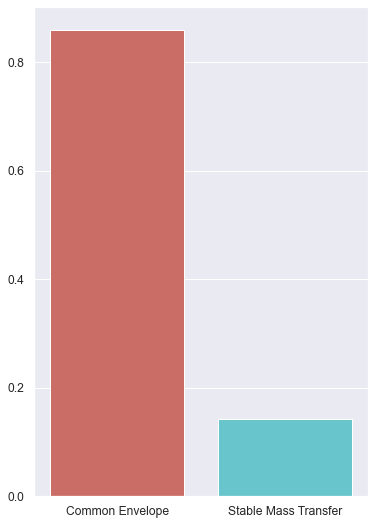

In [38]:
#Lets seperate the two labels.
label_true = full_dataset[(full_dataset['Formation by Common Envelope'] == True)] 
label_false = full_dataset[(full_dataset['Formation by Common Envelope'] == False)] 

#We investigate the population of each class.
t_counts = len(label_true)
f_counts = len(label_false)
# Count the size of the dataset (rows/instances) so we can convert to percentages.
N = len(full_dataset)

print('Total in dataset =',N)

print('Common Envelope =',t_counts)
print('Stable Mass Transfer =',f_counts)

Number_CommonEnv = round(t_counts*100/N,3)
Number_StableMassTrnsfr = round(f_counts*100/N,3)

print('Percentage of Common Envelope instances: ',Number_CommonEnv,'%')
print('Percentage of Stable Mass Transfer instances: ',Number_StableMassTrnsfr,'%')
print('The dataset is unbalanced')

# A barplot showing the imbalanced dataset.
print('The dataset is imbalanced which means that our classifiers will be biased toward the highly populated class (Common Envelope)')
fig, ax = plt.subplots(1,figsize=(6,9))
#ax.pie([Number_CommonEnv,Number_StableMassTrnsfr], explode=[0,0.1], labels=['Common Envelope','Stable Mass Transfer'], autopct='%1.2f%%',
        #shadow=True, startangle=45)
sns.set_style('darkgrid')
uniq_CE , counts_CE = np.unique(full_dataset['Formation by Common Envelope'],return_counts = True)
counts_CE=counts_CE[::-1]
sns.barplot(x=["Common Envelope","Stable Mass Transfer"],y=counts_CE/N,orient="v",palette = 'hls')

plt.show()

### Creating a balanced dataset

In [39]:
#Lets balance the dataset by, sampling random instances from the largest set, equal to, the max number of instaces in the smallest set
# In practice reduce the common envelope set to 346,004.

# Separate the two labels.
label_true = dataset[(dataset['Formation by Common Envelope'] == True)] 
label_false = dataset[(dataset['Formation by Common Envelope'] == False)]

# Get the size of each label.
t_counts = len(label_true)
f_counts = len(label_false)

# Determine the size of the smallest label.
min_counts = min(t_counts, f_counts)

# Reduce the larger label to the size of the smallest label.
if t_counts > f_counts:
    label_true = label_true.sample(n=min_counts, random_state=1)
else:
    label_false = label_false.sample(n=min_counts, random_state=1)

# Concatenate the two labels.
balanced_dataset = pd.concat([label_true, label_false])

# Count the size of the dataset (rows/instances) so we can convert to percentages.
N = len(balanced_dataset)

print('Total in dataset =', N)
print('Common Envelope =', min_counts)
print('Stable Mass Transfer =', min_counts)

Number_CommonEnv = round(min_counts * 100 / N, 3)
Number_StableMassTrnsfr = round(min_counts * 100 / N, 3)

print('Percentage of Common Envelope instances: ', Number_CommonEnv, '%')
print('Percentage of Stable Mass Transfer instances: ', Number_StableMassTrnsfr, '%')


Total in dataset = 692008
Common Envelope = 346004
Stable Mass Transfer = 346004
Percentage of Common Envelope instances:  50.0 %
Percentage of Stable Mass Transfer instances:  50.0 %


### Filtering out the extreme outliers

We can trim the dataset according to the Semi Major Axis. Filter out the 1% above values 53.2.
The same with Orbital Eccentricity. Filter out the 1% below 0.008 and the 1% above 0.67.



In [40]:
balanced_dataset[['Orbital Eccentricity','Semi Major Axis [Rsun]']].describe(percentiles=[0.01,0.99]).T


,count,mean,std,min,1%,50%,99%,max
Orbital Eccentricity,692008.0,0.074763,0.139523,0.000015,0.007946,0.01602,0.686288,1.0
Semi Major Axis [Rsun],692008.0,26.397353,607.786604,0.664170,3.389100,19.46700,53.129650,329100.0


In [153]:
dataset=balanced_dataset.copy()
# Trim the Orbital Eccentricity:
dataset_trimed = dataset[(dataset['Orbital Eccentricity'] <= 0.78)]
# Trim the Orbital Eccentricity:
dataset_trimed = dataset_trimed[(dataset_trimed['Orbital Eccentricity'] >= 0.008)]
# Trim the Semi Major Axis:
dataset_trimed = dataset_trimed[(dataset_trimed['Orbital Eccentricity'] <= 52)]
print(len(dataset))
print(len(dataset_trimed))
print('now we have a balanced and trimmed dataset')
dataset=dataset_trimed.copy()
dataset_trimed[['Orbital Eccentricity','Semi Major Axis [Rsun]']].describe(percentiles=[0.01,0.99]).T

692008
680471
now we have a balanced and trimmed dataset


,count,mean,std,min,1%,50%,99%,max
Orbital Eccentricity,680471.0,0.071232,0.127306,0.00800,0.008286,0.016089,0.61662,0.77999
Semi Major Axis [Rsun],680471.0,20.767367,12.262600,0.66417,3.412000,19.321000,52.60300,88.30800


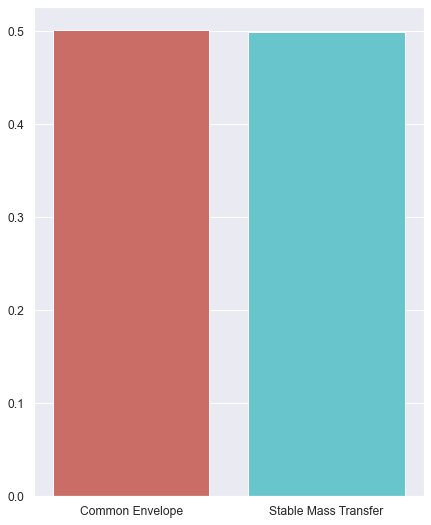

In [154]:
# A barplot showing the imbalanced dataset.
fig, ax = plt.subplots(1, figsize=(7,9))
N=len(dataset)
#ax.pie([Number_CommonEnv,Number_StableMassTrnsfr], explode=[0,0.1], labels=['Common Envelope','Stable Mass Transfer'], autopct='%1.2f%%',
        #shadow=True, startangle=45)
sns.set_style('darkgrid')
uniq_CE , counts_CE = np.unique(dataset['Formation by Common Envelope'],return_counts = True)
counts_CE=counts_CE[::-1]
sns.barplot(x=["Common Envelope","Stable Mass Transfer"],y=counts_CE/N,orient="v",palette = 'hls')

plt.show()

Metallicity samples percetanges in dataset:
 [(0.0002, 26.91), (0.0004, 25.78), (0.0012, 16.66), (0.0016, 13.98), (0.002, 11.36), (0.004, 4.55), (0.006, 0.59), (0.008, 0.11), (0.012, 0.05), (0.016, 0.02), (0.02, 0.01)]

Alpha samples percentages in dataset:
 [(0.5, 22.06), (1.0, 28.08), (3.0, 27.26), (5.0, 22.59)]


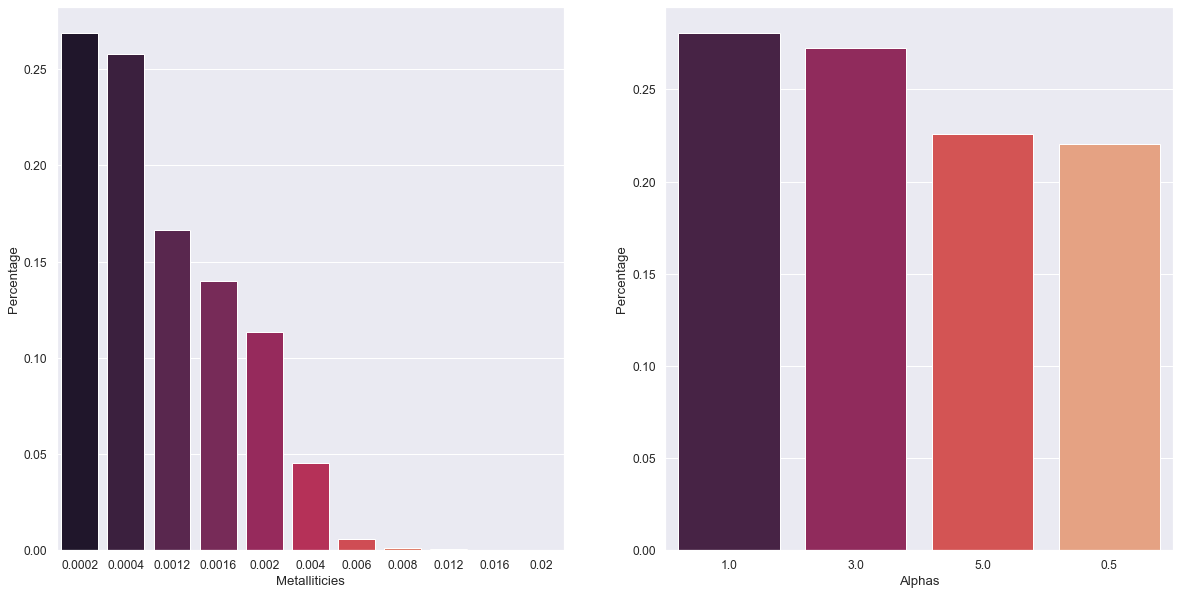

In [43]:
# Count the size of the dataset (rows/instances) so we can convert to percentages .
N = len(dataset)

uniq_met , counts_met = np.unique(dataset['Metallicity'],return_counts = True)
print('Metallicity samples percetanges in dataset:\n', list(zip(uniq_met,np.round(counts_met*100/N,2))))
dfmet=pd.DataFrame([uniq_met,counts_met/N],).T
dfmet.columns =['Metalliticies','Percentage']
print('')

uniq_alph , counts_alph = np.unique(dataset['Alpha'],return_counts = True)
print('Alpha samples percentages in dataset:\n', list(zip(uniq_alph,np.round(counts_alph*100/N,2))))
dfalph=pd.DataFrame([uniq_alph,counts_alph/N],).T
dfalph.columns =['Alphas','Percentage']

fig , ax = plt.subplots(1,2, figsize=(20,10))
#order=df.sort_values('Salary',ascending = False).Education
sns.barplot(x=dfmet["Metalliticies"],y=dfmet["Percentage"],ax=ax[0],order=dfmet.sort_values("Percentage",ascending=False).Metalliticies,orient="v",palette = 'rocket')#.set(title='Metallicities')
sns.barplot(x=dfalph["Alphas"],y=dfalph["Percentage"],ax=ax[1],order=dfalph.sort_values("Percentage",ascending=False).Alphas,orient="v",palette = 'rocket')
plt.show()

As plotted in this histograms we can see that over 80% of the dataset is simulated with the fourth lowest metallicities. 
This is because low metallicities stars loose a small amount of mass during their life due to stellar winds. This implies that when the Roche lobe overflow occurs, metal-poor stars have more mass available that can be transferred to the companion.

Instead the $\alpha$ values are well distributed.

## Dataset visualization

#### The Mass Gap

In [44]:
#sns.set(font_scale = 2)

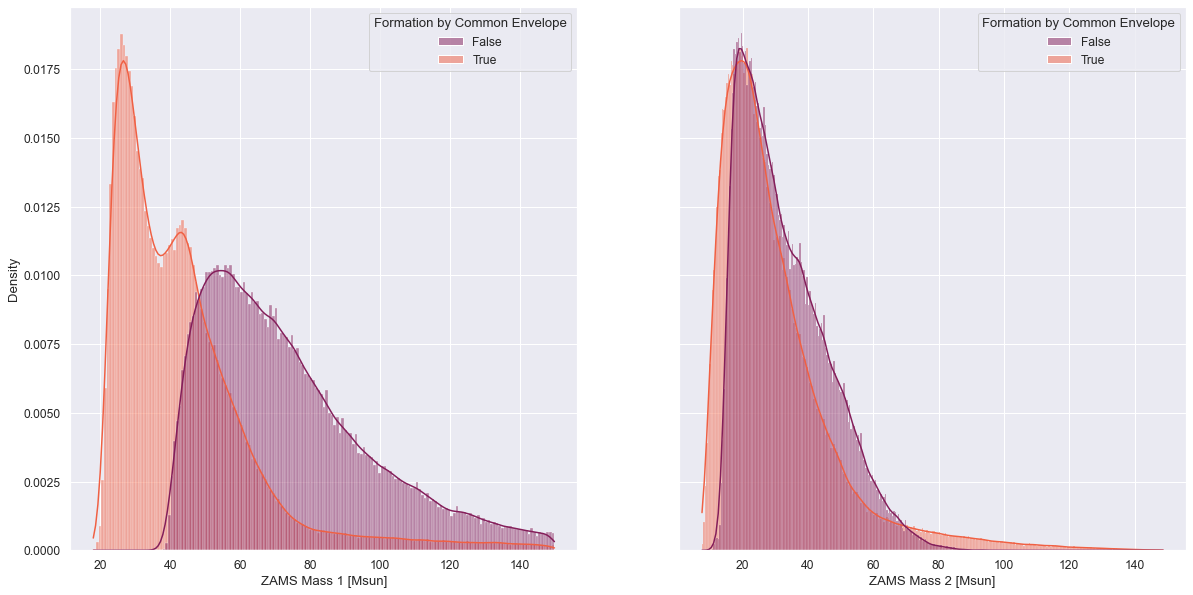

In [45]:
fig , ax = plt.subplots(1,2,figsize=(20,10),sharey=True,)

sns.histplot(data=dataset, x=dataset['ZAMS Mass 1 [Msun]'], kde=True,stat="density",hue=dataset["Formation by Common Envelope"],ax=ax[0],palette="rocket")
sns.histplot(data=dataset, x=dataset['ZAMS Mass 2 [Msun]'], kde=True,stat="density",hue=dataset["Formation by Common Envelope"],ax=ax[1],palette="rocket")

plt.show()

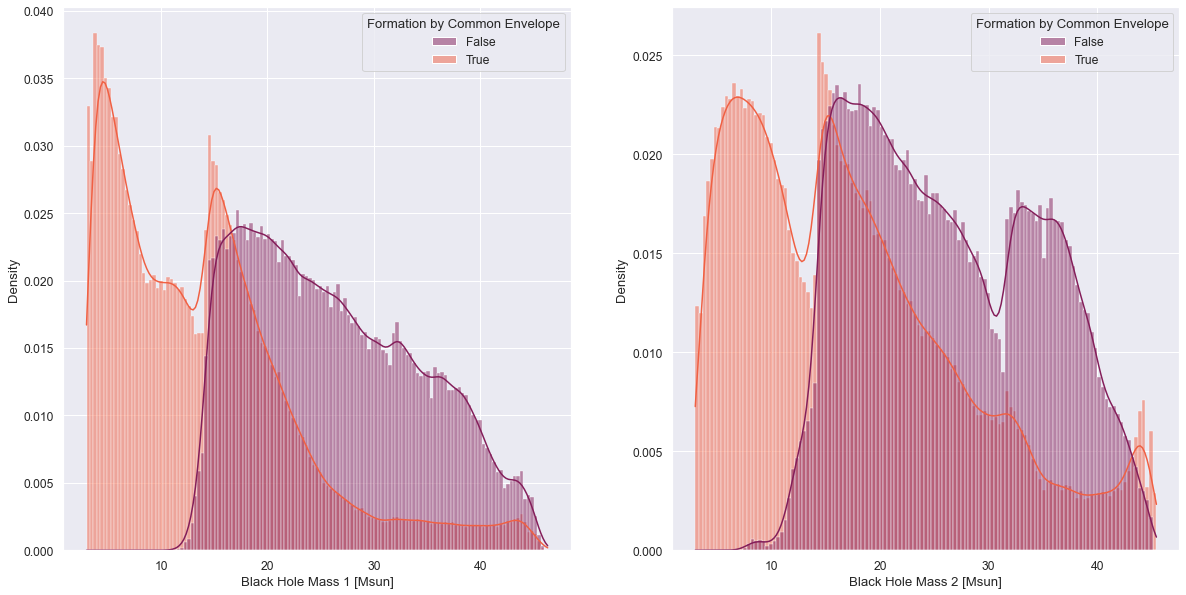

In [46]:
fig , ax = plt.subplots(1,2,figsize=(20,10))

sns.histplot(data=dataset, x='Black Hole Mass 1 [Msun]',ax=ax[0],label=None,kde=True,stat="density",hue="Formation by Common Envelope",palette="rocket")
sns.histplot(data=dataset, x='Black Hole Mass 2 [Msun]',ax=ax[1],label=None,kde=True,stat="density",hue="Formation by Common Envelope",palette="rocket")
#fig.suptitle('This is a somewhat long figure title', fontsize=16)
plt.tight_layout
plt.show()


#### Semi major axis

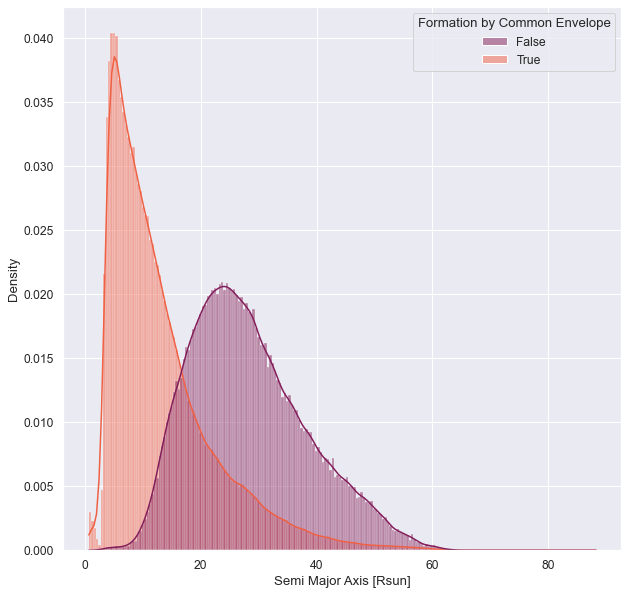

In [47]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
#df = pd.DataFrame(dataset[dataset['Semi Major Axis [Rsun]']<150])
#print(len(df))
sns.histplot(data=dataset,x=r'Semi Major Axis [Rsun]',kde=True,stat="density",hue='Formation by Common Envelope',palette="rocket")
plt.show()

We can also compute the orbital period P of the binaries and plot it against the initial mass ratio q, which are two important astrophysical quantities

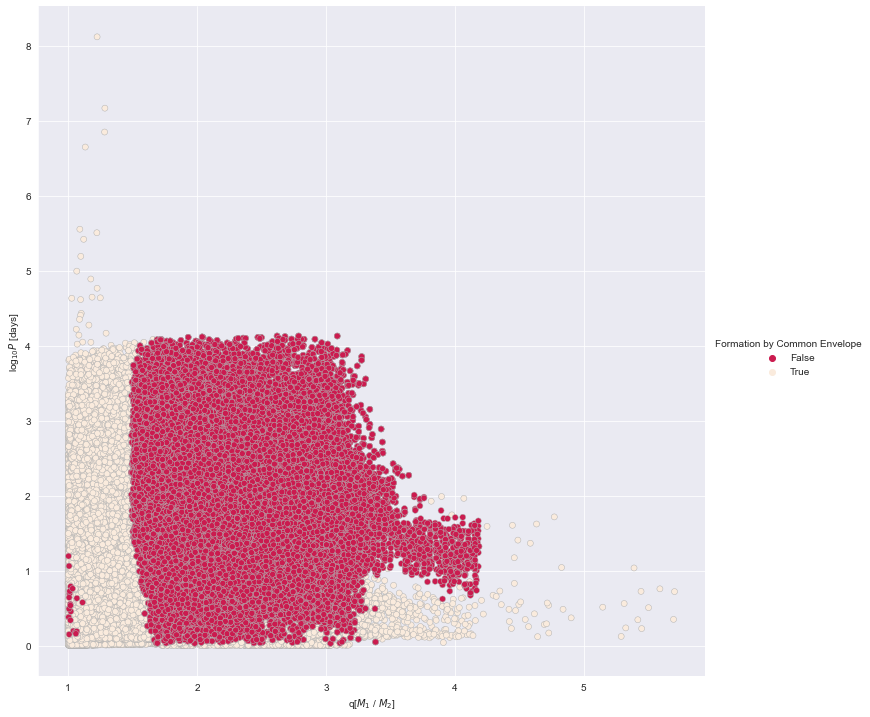

In [13]:
q = dataset['ZAMS Mass 1 [Msun]'] / dataset['ZAMS Mass 2 [Msun]']
a = dataset['Semi Major Axis [Rsun]']
M = dataset['ZAMS Mass 1 [Msun]'] + dataset['ZAMS Mass 2 [Msun]']

#Calculating G in the appropriate units
from scipy.constants import G

# 1 M_Sun = 2e+30     kg
# 1 R_Sun = 6.957e+8  m
# 1 day   = 86400     s

G = G * (1 / (6.957e8))**3 * (1 / 2e30)**(-1) * (1 / 86400)**(-2) #R_Sun**3 * M_Sun**-1 * days**-2

P = 2*np.pi * np.sqrt(a**3 / (G * M )) #days
dataset['P'] = P
dataset['q'] = q



g = sns.relplot(
    data=dataset,
    x="q", y="P", hue=dataset['Formation by Common Envelope'],
    palette="rocket", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)


g.set(xlabel=r'q[$M_1$ / $M_2$]',ylabel=r'log$_{10}P$ [days]',)#yscale='log',xlim=(1,3.1), ylim=(1e-1 / 2,10/2))


### Plot each feature against each other

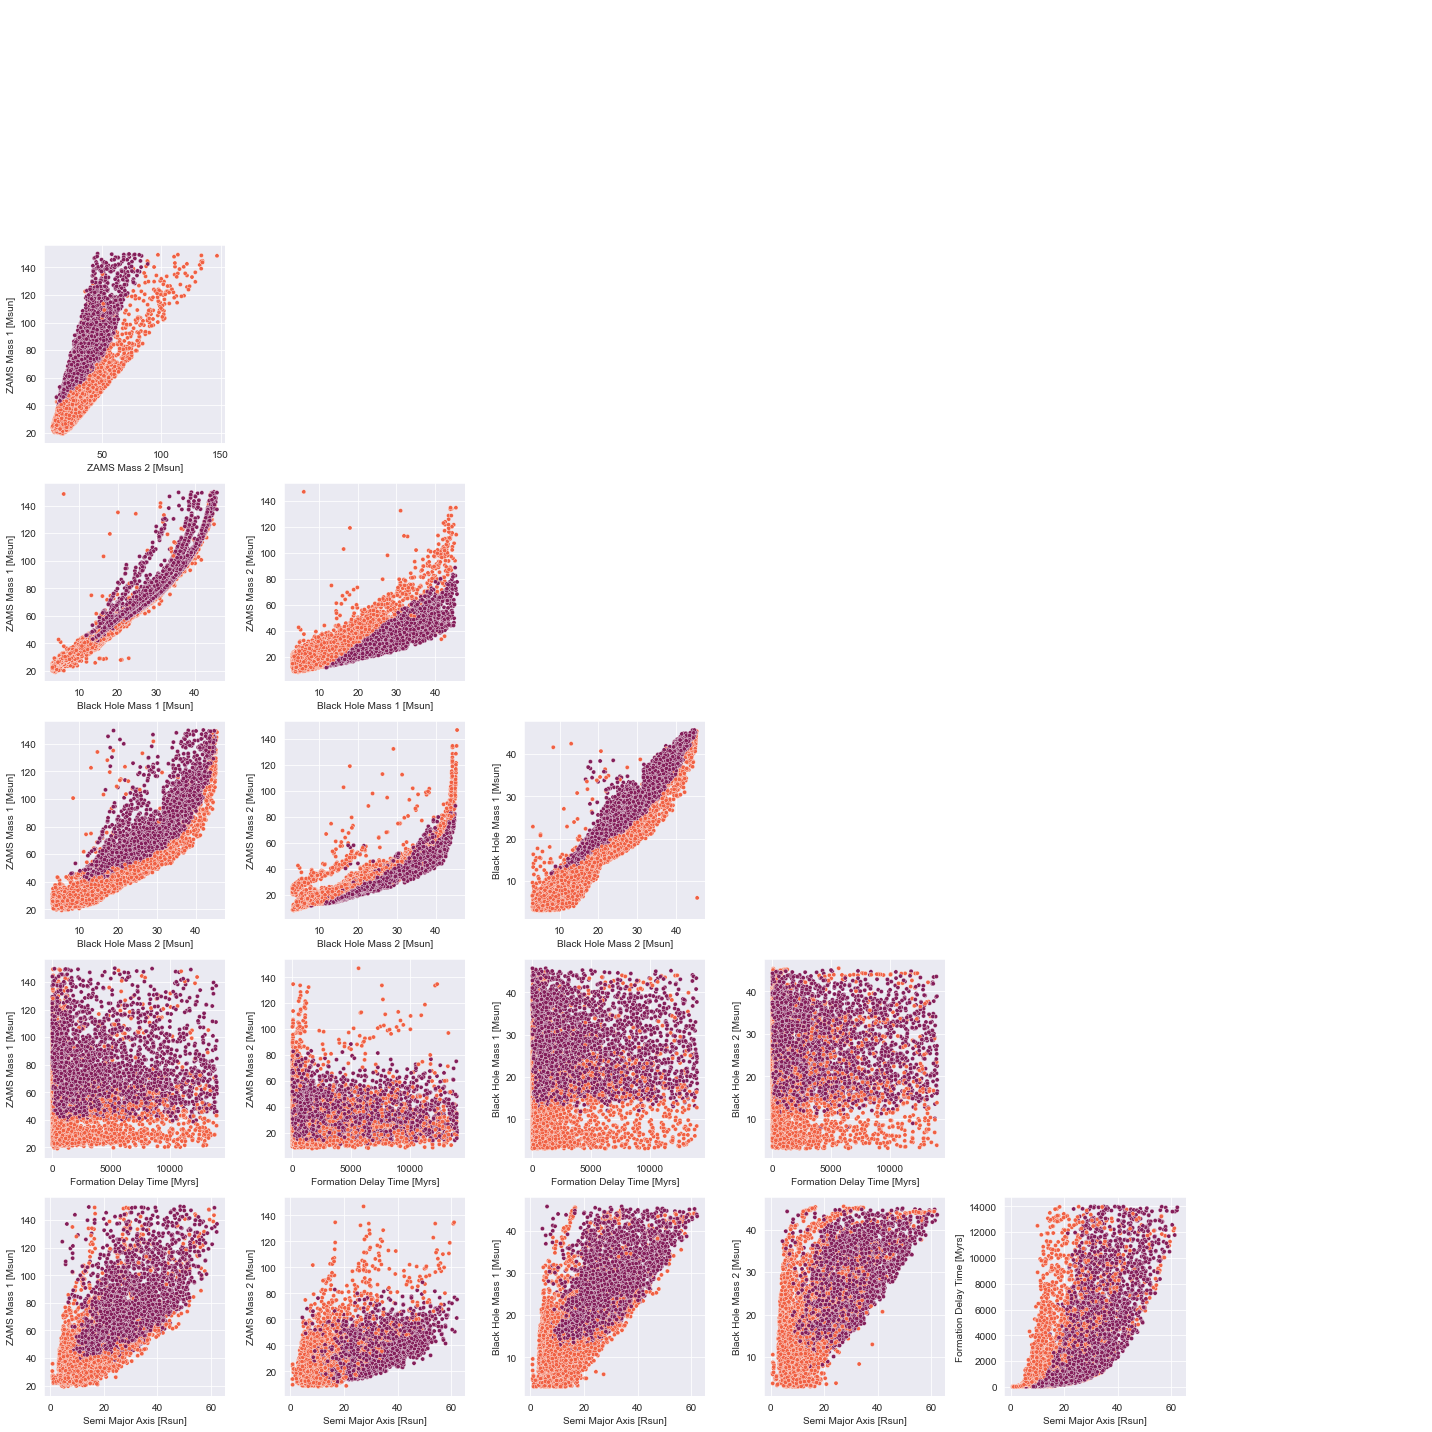

In [22]:
# We can also plot the features against each other to visually infer towards their separability and therefore their
# importance to the classification task.

fig , ax = plt.subplots(6,6, figsize=(20,20))

for i in range(6):
    for j in range(6):
        if i<=j:
            #make it triangular
            ax[i,j].axis('off')
        else:
            #using a fraction of data
            sns.scatterplot(x=X.iloc[0:692007:100,i], y=X.iloc[0:692007:100,j], 
                            ax=ax[i,j], 
                            #cmap=cmap, 
                            hue=Y, 
                            size=0.0001,
                            palette = 'rocket',
                            legend=False) 

            # print('Fig',i,j) - homemade progress bar
plt.tight_layout()
plt.show()


### Correlation Matrix

In [155]:
# drop Binary ID , label set, the rest keep as features.

X = dataset.drop(columns = ['Binary ID','Formation by Common Envelope'])   #Dropping the ID and Label columns.
Y = dataset['Formation by Common Envelope'].astype(int)    #Extracting and Transforming the Booleans to 0-1. This is crucial for the ML algorithms.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,Y, train_size=0.3, test_size=0.7, random_state=None, shuffle=True)


X_train_norm = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns, index=X_train.index)

X_test_norm = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns, index=X_test.index)

In [156]:
# Here we show that the correlations are invariant to the scaling of the features.

# The scaling is being applied to each feature indipendently. This means that for each feature the mean and the std are being 
# calculated and based on those, applied to the specific feature in order for it to end up centered around zero with a 
# standard deviation of 1.

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
pd.set_option("chop_threshold", 1e-10)

X_norm = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

X_norm.describe().T[['mean','std']]



,mean,std
ZAMS Mass 1 [Msun],0.000000e+00,1.000001
ZAMS Mass 2 [Msun],0.000000e+00,1.000001
Black Hole Mass 1 [Msun],0.000000e+00,1.000001
Black Hole Mass 2 [Msun],0.000000e+00,1.000001
Formation Delay Time [Myrs],0.000000e+00,1.000001
Semi Major Axis [Rsun],0.000000e+00,1.000001
Orbital Eccentricity,0.000000e+00,1.000001
Alpha,0.000000e+00,1.000001
Metallicity,0.000000e+00,1.000001


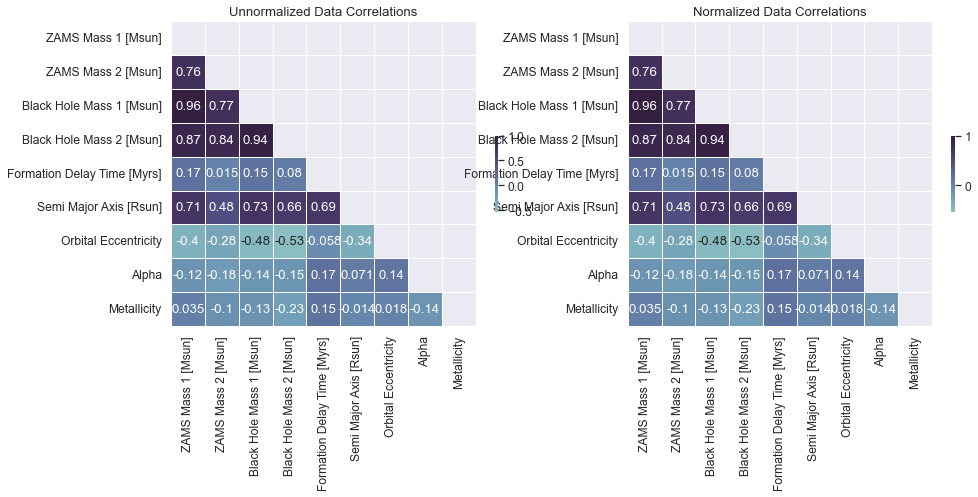

In [157]:
#sns.set(font_scale = 1.1)

# Lets find the correlation of the features.
correlation_matrix =  X.corr()   
# Set up the matplotlib figure.
f, ax = plt.subplots(1,2,figsize=(15, 7))

# Generate a custom diverging colormap.
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#mask to make it triangular
matrix = np.triu(X.corr())

# Draw the heatmap with the mask and correct aspect ratio.
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .2}, ax=ax[0],annot=True, mask=matrix).set(title='Unnormalized Data Correlations')

# Compute again the corraletion matrix.By visually comparing the two correlation matrices we can see that they are the same.
norm_correlation_matrix = X_norm.corr() 
#and plot
sns.heatmap(norm_correlation_matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .2}, ax=ax[1],annot=True, mask=matrix).set(title='Normalized Data Correlations')

#plt.tight_layout()
plt.show()

### Performing PCA in raw and standardized data

We ispect the dataset for the possibility of dimensionality reduction by performing PCA. This doesn't actually help us with the ultimate task of finding feature importance, but will give us an idea of how many dimensions are relevent in the space of covariance. If PCA yields that dimensionality reduction is possible, this is a good indicator that some feats are better than others. If PCA yields that all PCs are relevent then this is an indication that most features are important in the sense that most of them contribute to the variance of the data.

In [51]:
# raw
pca = PCA(n_components=7)
pca.fit(X)
np.set_printoptions(precision=10,suppress=True)
print(pca.explained_variance_ratio_*100)

[99.9905208172  0.0084508715  0.000676828   0.0002218356  0.0000898246
  0.0000223877  0.00001736  ]


We got 99.99% of variance in one direction with the raw data

In [52]:
# and standardized

pca = PCA(n_components=7)
pca.fit(X_norm)
np.set_printoptions(precision=10,suppress=True)
print(pca.explained_variance_ratio_*100)

[49.4154010464 16.7302033276 12.8780135703  8.676666953   7.5787789889
  3.0381012471  0.9186835694]


All feature matters!

### Classification task and feature importance

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
import shap
from IPython.display import clear_output


In [159]:
#from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
#patch_sklearn() 

We run some simple machine algorithm in order to extract the most important features in our dataset. First with the balanced and trimmed dataset so the ML models are not biased towards the highest cardinality label and then we compare with the full unbalanced dataset. 
We compare Linear SVM, Random forest and Neural Network and we use sklearn built-in feature importance method such as permutation importance and more advanced SHAP values for an even smaller dataset (n=50000).


In [254]:
def plot_feat_permutation_importances(model, X_test, y_test):
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    
    result = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, n_jobs=-1)    
    importances = pd.Series(result.importances_mean, index=X_test.columns)
    
    sns.barplot(y=X_test.columns,x=importances,orient="h",palette='rocket',ax=ax, xerr=result.importances_std )
    
    #ax.set_title("Feature importances using permutation")
    ax.set_xlabel("Mean accuracy decrease")
    sns.set(font_scale=1.2)
    
    fig.tight_layout()
    fig.savefig('perm_imp.png')
    plt.show()
    

In [196]:
def plot_shap(model,x_test):
    # Fits the explainer
    n=10000
    explainer = shap.Explainer(model.predict, x_test[:n])
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(x_test[:n])
    fig, ax = plt.subplots(1,1, figsize=(7,4))
    ax=sns.barplot(y=X_test.columns,x=np.mean(abs(shap_values.values),axis=0),orient="h",palette='rocket',ax=ax, )
    #ax.set_title("Feature importances with SHAP value")
    ax.set_xlabel("Mean(|SHAP value|)")
    
    fig.tight_layout()
    fig.savefig(f'/Shap_{model}.png')
    plt.show()

In [207]:
def plot_feat_mdi(model, X_test, y_test):
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
    sns.barplot(y=X_test.columns, x=importances, orient="h", palette='rocket', ax=ax, xerr=std)
    
    #ax.set_title("Feature importances using MDI")
    ax.set_xlabel("Mean decrease in impurity")
    sns.set(font_scale=1.2)
    fig.tight_layout()
    plt.savefig('mdi.png')
    fig.tight_layout()
    #fig.savefig(f'/MDI_{model}.png')
    plt.show()

In [163]:
#Plot dedrogram
from scipy.cluster import hierarchy
def plot_dendrogram(model):
    # Extract feature importances for each tree in the forest
    tree_importances = [tree.feature_importances_ for tree in model.estimators_]

    # Calculate the distance matrix between trees based on their feature importances
    dist_matrix = hierarchy.distance.pdist(tree_importances)

    # Perform hierarchical clustering on the distance matrix
    linkage_matrix = hierarchy.linkage(dist_matrix, method='ward')

    # Plot the dendrogram using seaborn
    fig, ax = plt.subplots(figsize=(15, 10))
    dendrogram = hierarchy.dendrogram(linkage_matrix, labels=range(len(model.estimators_)), ax=ax)
    
    fig.tight_layout()
    #fig.savefig('../../Desktop/dendrogram.png')
    ax.set_xlabel("Tree")
    ax.set_ylabel("Distance")
    ax.set_title("Dendrogram of Random Forest feature importances")
    plt.show()


## Balanced dataset

### Train/test split

In [164]:
# Use Train-Test-Split. Note that once the user specifies the size of the train set, then the test set is the remainder.

X_train, X_test, y_train, y_test = train_test_split(X ,Y, train_size=0.5, test_size=0.5, random_state=None, shuffle=True)

# We also shuffle the instances before splitting.
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns, index=X_train.index)

X_test = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns, index=X_test.index)

X_test

,ZAMS Mass 1 [Msun],ZAMS Mass 2 [Msun],Black Hole Mass 1 [Msun],Black Hole Mass 2 [Msun],Formation Delay Time [Myrs],Semi Major Axis [Rsun],Orbital Eccentricity,Alpha,Metallicity
2159585,1.198432,-0.003684,0.536279,0.015656,1.366945,1.110994,-0.477586,1.544573,2.734573
678297,0.547706,-0.064139,0.927139,0.713159,-0.011516,0.890446,-0.493328,-0.777288,-0.780600
1293747,0.056608,1.332702,0.367019,1.234313,-0.550366,0.301475,-0.342068,0.383642,-0.780600
356067,1.244032,0.536269,1.333628,1.053146,-0.726027,0.127989,-0.451301,-1.067521,0.144446
294640,0.198386,0.805787,0.324290,0.819406,-0.818734,-0.490508,-0.486932,-1.067521,0.144446
...,...,...,...,...,...,...,...,...,...
360542,2.534230,2.402323,1.890365,1.721538,0.618513,2.028015,-0.144928,-1.067521,0.144446
1061329,0.428191,1.154875,0.574610,1.064401,0.291776,1.084160,-0.431657,-0.777288,0.144446
771742,0.481278,-0.293210,0.074660,-0.290431,2.955082,1.113115,-0.461067,-0.777288,2.734573
67816,0.417727,-0.454012,0.136363,-0.095919,-0.792164,-0.579086,-0.467262,-1.067521,0.884482


### RBF 

In [258]:
# hyperparameter values found with GridSearch (see bottom on notebook) 
 
rbf_svm = SVC(C=10,  
               kernel='rbf',  
               gamma=1,  
               coef0=0.0,  
               shrinking=True,  
               probability=False, 
               tol=0.001,  
               cache_size=500,  
               verbose=True,  
               max_iter=6000, 
               decision_function_shape='ovr',  
               break_ties=False, 
               random_state=None) 
 
rbf_svm.fit(X_train,  y_train) 
 
print('RBF SVM score on normalized train set:',round(rbf_svm.score(X_train,y_train)*100,3),'%') 
print('RBF SVM score on normalized test set:',round(rbf_svm.score(X_test,y_test)*100,3),'%')

[LibSVM].....WARN: libsvm Solver reached max_iter
optimization finished, #iter = 6000
obj = -23708.966457, rho = 0.475101
nSV = 5024, nBSV = 2727
Total nSV = 5024


Solver terminated early (max_iter=6000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


RBF SVM score on normalized train set: 99.901 %
RBF SVM score on normalized test set: 99.861 %


In [259]:
rbf_svm.score(X_test, y_test)

0.9986127276361114

KeyboardInterrupt: 

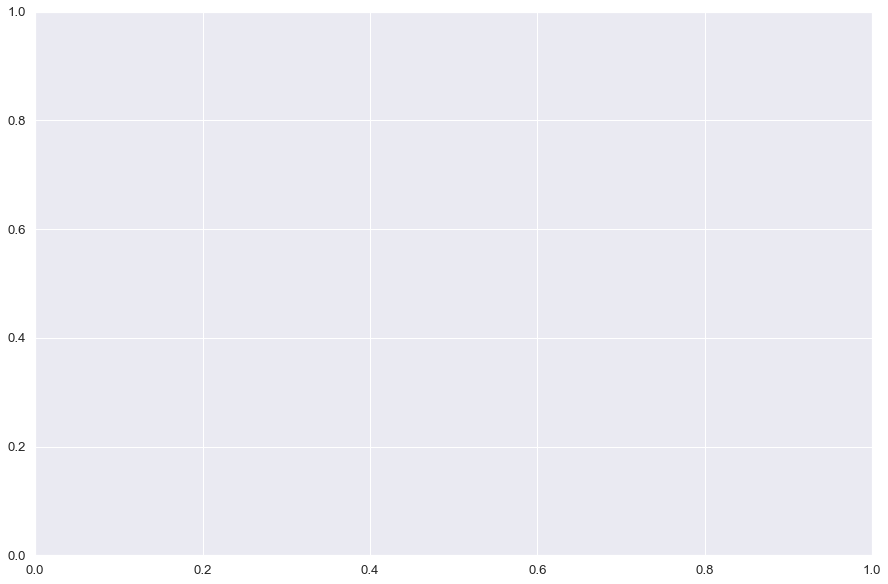

In [260]:
plot_feat_permutation_importances(rbf_svm,X_test,y_test)

### Linear SVM
The easiest way to understand feature importance is the Linear Classification problem (Halfspace). The importance of each feature is nothing else but the coefficients of the dividing plane. We performed Gridsearch and found the best hyperparameters.


In [165]:
lin_svm = LinearSVC(penalty='l2',
                    dual=False,
                    C=1,
                    max_iter=100,
                    loss='squared_hinge',
                    fit_intercept=True, 
                    verbose=False, 
                    random_state=None)


In [166]:
lin_svm.fit(X_train,y_train)
lin_svm.score(X_test, y_test)

0.9797434721781352

Intercept= [0.3346408139]
Coefficients are:
ZAMS Mass 1 [Msun]             0.948125
ZAMS Mass 2 [Msun]             3.770793
Black Hole Mass 1 [Msun]       2.457353
Black Hole Mass 2 [Msun]       1.014419
Formation Delay Time [Myrs]    0.276864
Semi Major Axis [Rsun]         0.804331
Orbital Eccentricity           0.109326
Alpha                          0.014799
Metallicity                    0.096306
dtype: float64


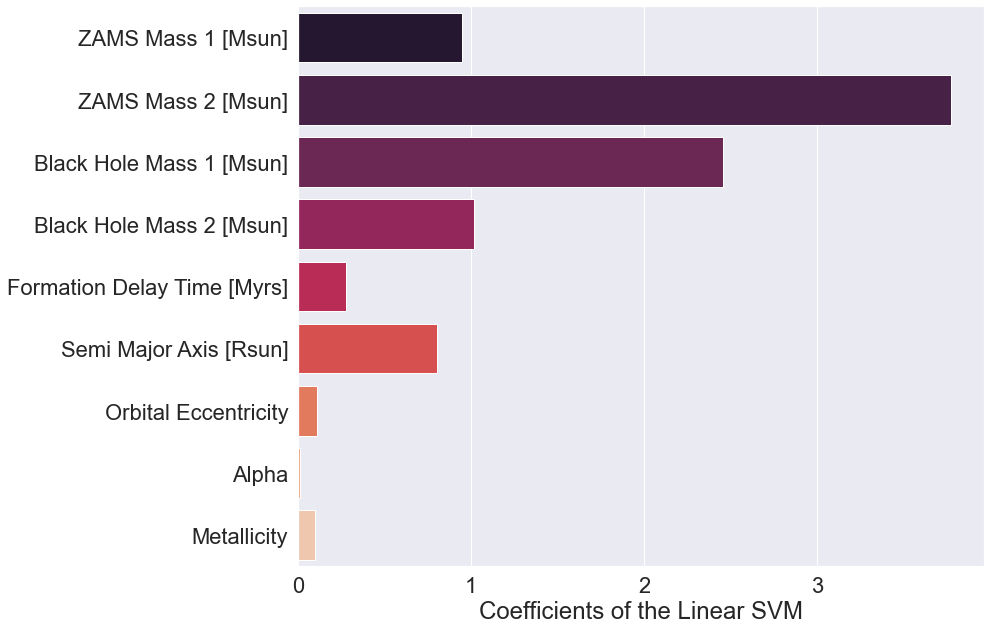

In [193]:
# Get the coefficients and plot them
coef = pd.Series(abs(lin_svm.coef_[0]), index=X_train.columns)
print('Intercept=',lin_svm.intercept_)
print('Coefficients are:')
print(coef)
fig, ax = plt.subplots(1,figsize=(15,10))
ax = sns.barplot(y=coef.index,x=coef,saturation=0.8,orient="h",palette='rocket')
#plot.set(title='Coefficients of the Linear SVM')
ax.set_xlabel('Coefficients of the Linear SVM')
sns.set(font_scale=4)
fig.tight_layout()
plt.savefig('weights.png')

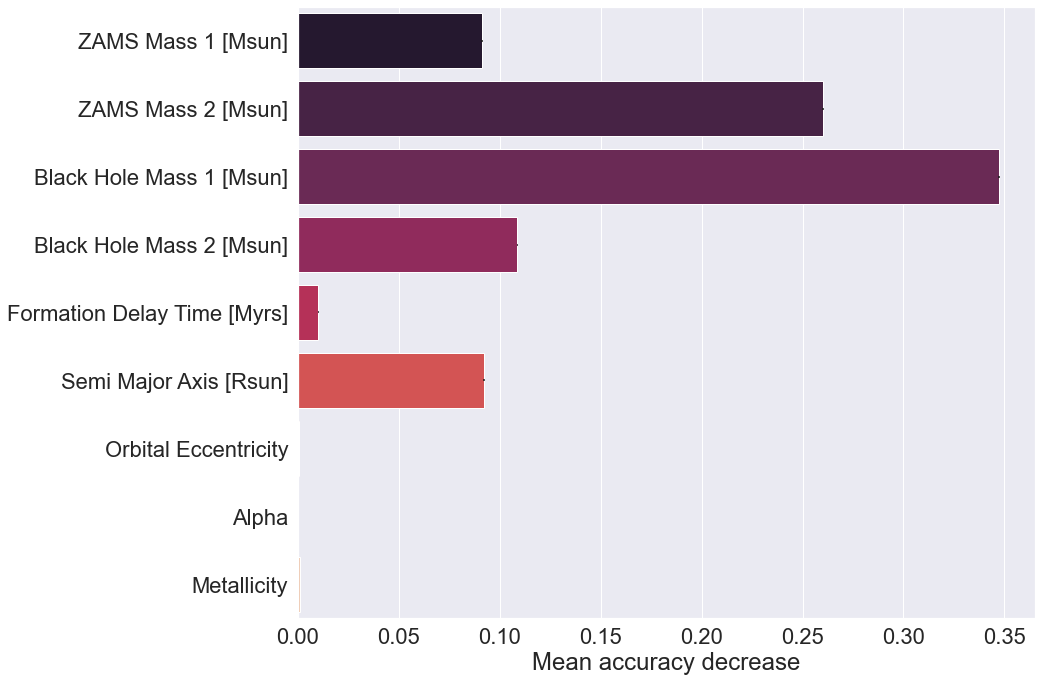

In [228]:
plot_feat_permutation_importances(lin_svm,X_test,y_test)

Exact explainer: 10001it [00:35, 202.11it/s]                          


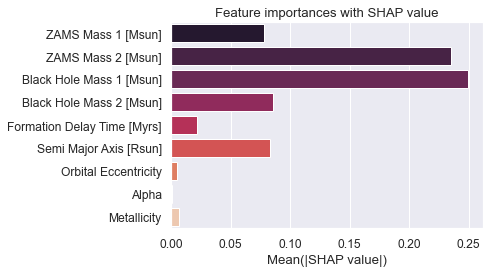

In [75]:
#plot shap values
plot_shap(lin_svm,X_test)

### Random Forest

In [229]:
# optimum hyperparameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 75}

rfc = RandomForestClassifier(n_estimators=75, 
                       criterion='gini', 
                       max_depth=10, 
                       min_samples_split=10, 
                       min_samples_leaf=5, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='sqrt', 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                       bootstrap=True, 
                       oob_score=False, 
                       n_jobs=-1, 
                       random_state=None, 
                       verbose=False, 
                       warm_start=False, 
                       ccp_alpha=0.0 )

In [230]:
rfc.fit(X_train,y_train)
clear_output()
print('Random Forest score on normalized train set:',round(rfc.score(X_train,y_train)*100,3),'%')
print('Random Forest score on normalized test set:',round(rfc.score(X_test,y_test)*100,3),'%')

Random Forest score on normalized train set: 98.651 %
Random Forest score on normalized test set: 98.527 %


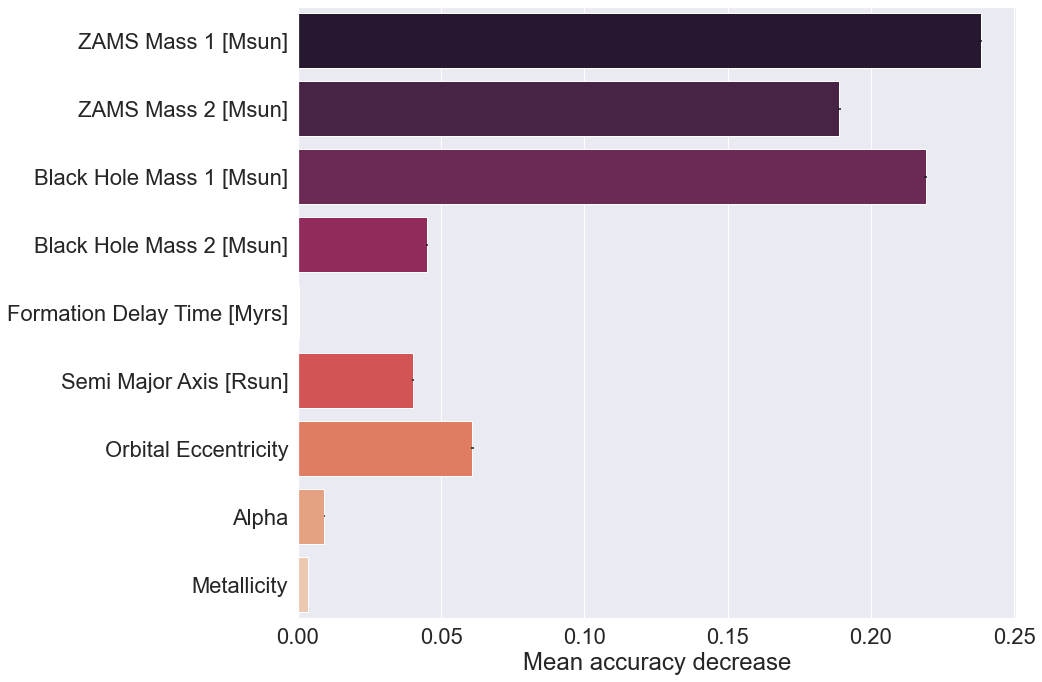

In [240]:
plot_feat_permutation_importances(rfc,X_test,y_test)

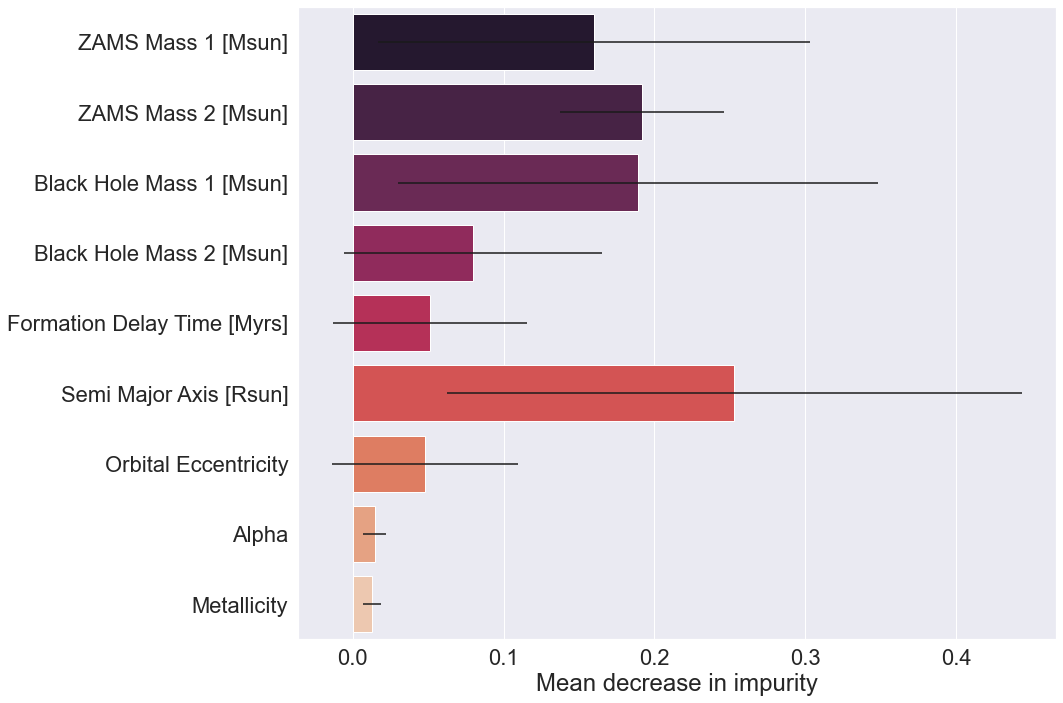

In [241]:
plot_feat_mdi(rfc,X_test,y_test)

Exact explainer: 10001it [09:59, 16.37it/s]                           


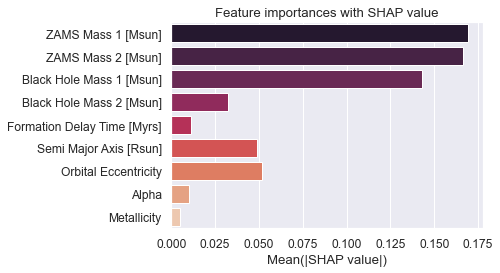

In [80]:
plot_shap(rfc,X_test)

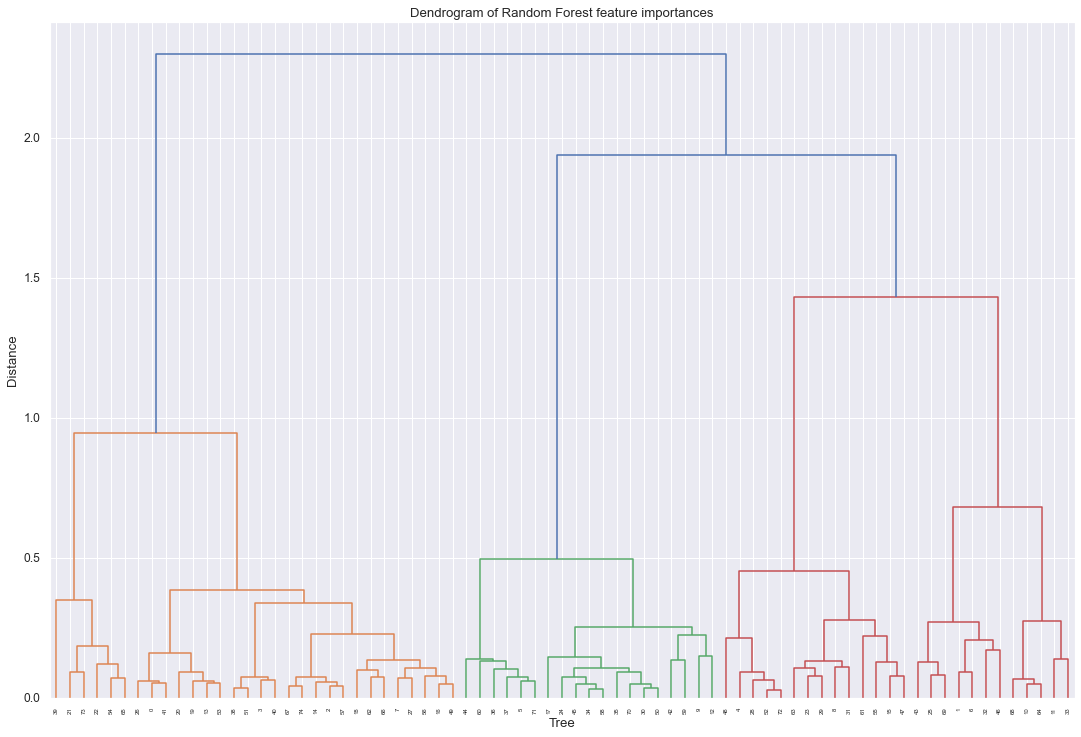

In [81]:
plot_dendrogram(rfc)

### Neural Network

In [235]:
#hyperparameter values found with GridSearch 'batch_size': 10, 'learning_rate_init': 1e-05, 'max_iter': 40}

mlp = MLPClassifier(hidden_layer_sizes=(1), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.01,
                    batch_size= 10, 
                    learning_rate='adaptive', 
                    learning_rate_init=1e-04, 
                    #beta_1
                    #beta_2
                    #epsilon
                    max_iter=20,
                    tol=0.0001, 
                    verbose=1,
                    early_stopping=True,
                    n_iter_no_change=3 )



In [236]:
mlp.fit(X_train,y_train)
clear_output()
print('Neural Net score on normalized train set:',round(mlp.score(X_train,y_train)*100,3),'%')
print('Neural Net score on normalized test set:',round(mlp.score(X_test,y_test)*100,3),'%')



Neural Net score on normalized train set: 98.216 %
Neural Net score on normalized test set: 98.169 %


Text(0, 0.5, 'Loss/Accuracy')

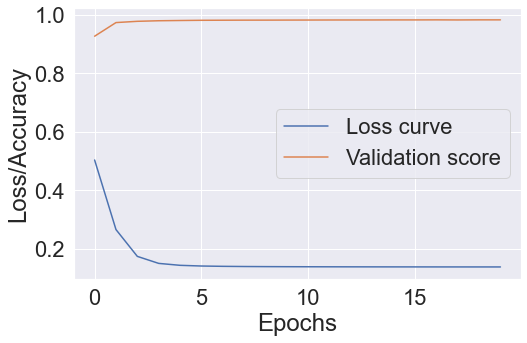

In [237]:
# Plots of the Loss curve and the Validation score measured in Accuracy(score).

fig, ax = plt.subplots(1,1, figsize=(8, 5))

sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.loss_curve_, ax=ax, palette='icefire',label='Loss curve')
sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.validation_scores_, ax=ax, palette='icefire', label='Validation score')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

Intercept= [[8.8009174557]]
Coefficients are:
ZAMS Mass 1 [Msun]             2.410890
ZAMS Mass 2 [Msun]             4.391235
Black Hole Mass 1 [Msun]       3.211661
Black Hole Mass 2 [Msun]       0.324225
Formation Delay Time [Myrs]    0.411060
Semi Major Axis [Rsun]         1.291244
Orbital Eccentricity           0.827435
Alpha                          0.030337
Metallicity                    0.143795
dtype: float64


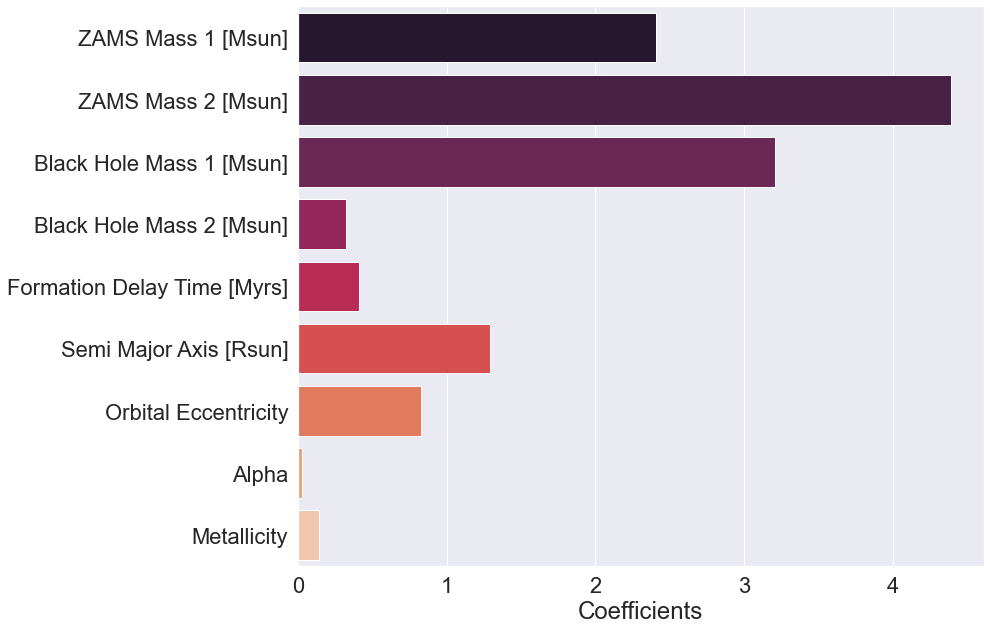

In [248]:
# Get the coefficients and plot them 
coef = pd.Series(abs(mlp.coefs_[0].T[0]), index=X_train.columns) 
print('Intercept=',mlp.coefs_[1]) 
print('Coefficients are:') 
print(coef) 
fig, ax = plt.subplots(1,1, figsize=(15, 10))

ax = sns.barplot(y=coef.index,x=coef,saturation=0.8,orient="h",palette='rocket') 
#plot.set(title='Coefficients')
ax.set_xlabel('Coefficients')
#sns.set(font_scale=4)
    #sns.set(font_scale=2)
fig.tight_layout()
fig.savefig('NN.png')

In [239]:
#fig.savefig('../../Desktop//Loss-Validation-NN')

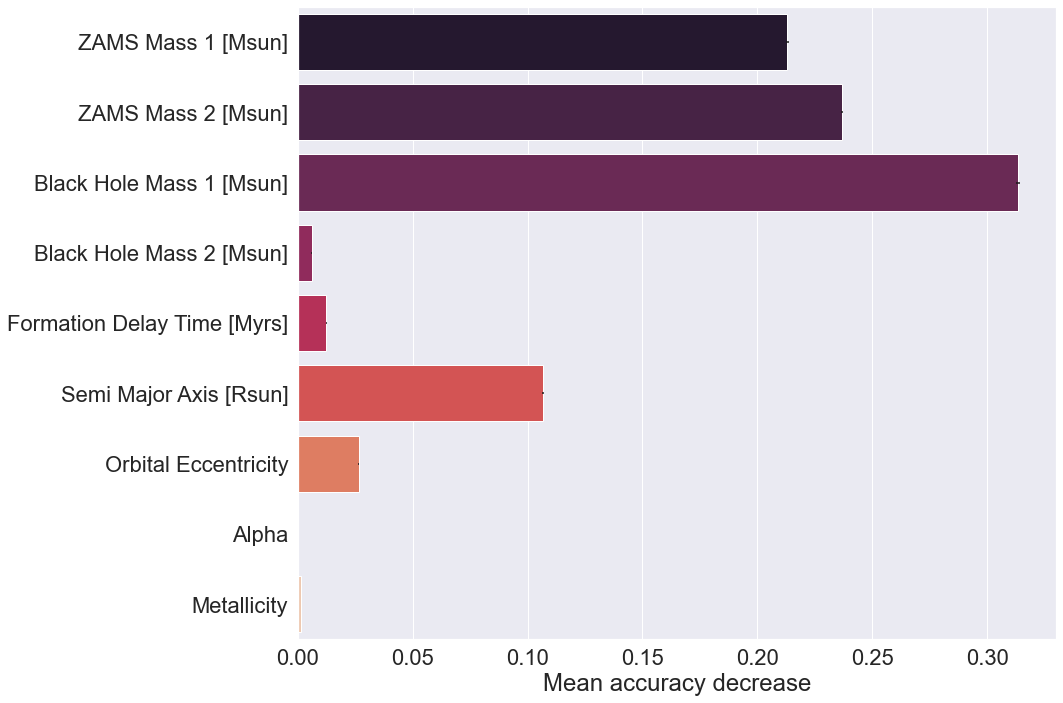

In [255]:
plot_feat_permutation_importances(mlp,X_test,y_test)

Exact explainer: 10001it [01:12, 118.43it/s]                          


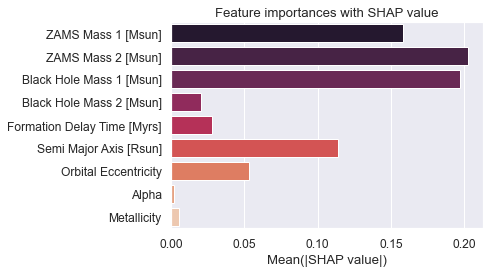

In [87]:
plot_shap(mlp,X_test)

## Full Dataset 

In [110]:
dataset=full_dataset.copy()

X = dataset.drop(columns = ['Binary ID','Formation by Common Envelope'])   #Dropping the ID and Label columns.
Y = dataset['Formation by Common Envelope'].astype(int)    #Extr

# Use Train-Test-Split. Note that once the user specifies the size of the train set, then the test set is the remainder.

X_train, X_test, y_train, y_test = train_test_split(X ,Y, train_size=0.5, test_size=0.5, random_state=None, shuffle=True)

# We also shuffle the instances before splitting.
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns, index=X_train.index)

X_test = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns, index=X_test.index)

X_test

,ZAMS Mass 1 [Msun],ZAMS Mass 2 [Msun],Black Hole Mass 1 [Msun],Black Hole Mass 2 [Msun],Formation Delay Time [Myrs],Semi Major Axis [Rsun],Orbital Eccentricity,Alpha,Metallicity
1231594,1.083486,0.484631,0.989803,0.855294,1.416959,0.048206,-0.607687,0.406390,0.911409
702888,1.281866,0.874769,1.553805,1.654383,-0.580589,0.010438,-0.474433,-0.784197,-0.744813
2152390,-0.043151,-0.625439,0.157159,-0.074497,2.628655,0.031791,-0.579566,1.596977,-0.744813
966620,-0.635266,-0.217147,-0.752097,-0.262863,-0.711315,-0.034274,-0.542370,-0.784197,0.175310
582,0.609719,-0.208632,0.537865,0.218624,0.763995,0.026123,-0.593065,-1.081844,0.911409
...,...,...,...,...,...,...,...,...,...
2279926,-0.045340,-0.648567,0.055538,-0.117281,-0.573504,-0.011649,-0.576006,1.596977,-0.560788
1215706,1.030705,-0.065702,1.675228,-1.204310,2.945029,0.026834,-0.122972,-0.784197,0.543360
2157481,1.218027,-0.218810,0.663328,0.067233,1.897367,0.036693,-0.592453,1.596977,2.751656
171070,4.101097,6.083361,1.950856,1.444321,2.085651,0.076402,-0.629518,-1.081844,2.751656


#### Linear svm


In [111]:
lin_svm = LinearSVC(penalty='l2',
                    dual=False,
                    C=1,
                    max_iter=100,
                    loss='squared_hinge',
                    fit_intercept=True, 
                    verbose=False, 
                    random_state=None)


In [113]:
lin_svm.fit(X_train,y_train)
lin_svm.score(X_test, y_test)


0.9734756629038211

Intercept= [2.2893996813]
Coefficients are:
ZAMS Mass 1 [Msun]             0.133206
ZAMS Mass 2 [Msun]             3.663859
Black Hole Mass 1 [Msun]       2.390497
Black Hole Mass 2 [Msun]       1.538697
Formation Delay Time [Myrs]    0.139182
Semi Major Axis [Rsun]         0.111446
Orbital Eccentricity           0.181676
Alpha                          0.032287
Metallicity                    0.267970
dtype: float64


[Text(0.5, 1.0, 'Coefficients')]

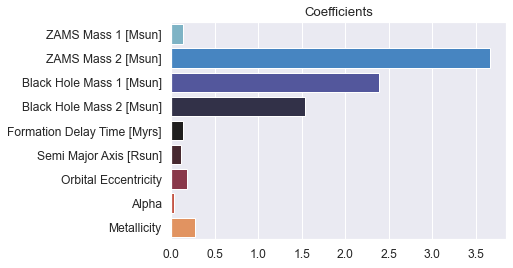

In [114]:
# Get the coefficients and plot them
coef = pd.Series(abs(lin_svm.coef_[0]), index=X_train.columns)
print('Intercept=',lin_svm.intercept_)
print('Coefficients are:')
print(coef)
plot = sns.barplot(y=coef.index,x=coef,saturation=0.8,orient="h",palette='icefire')
plot.set(title='Coefficients')

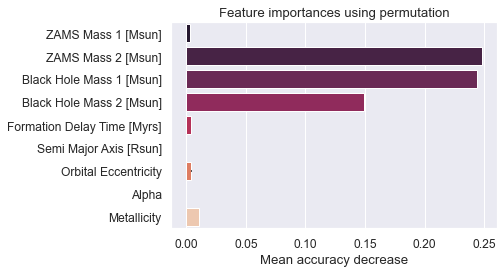

In [115]:
plot_feat_permutation_importances(lin_svm,X_test,y_test)

Exact explainer: 10001it [00:35, 205.23it/s]                          


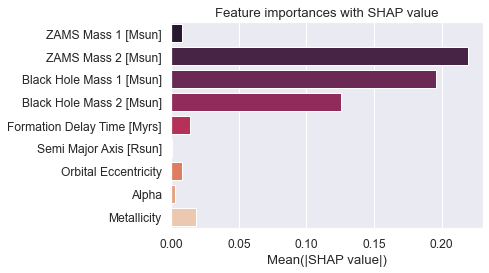

In [116]:
plot_shap(lin_svm,X_test)

### Random Forest

In [117]:
rfc = RandomForestClassifier(n_estimators=75, 
                       criterion='gini', 
                       max_depth=10, 
                       min_samples_split=10, 
                       min_samples_leaf=5, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='sqrt', 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                       bootstrap=True, 
                       oob_score=False, 
                       n_jobs=-1, 
                       random_state=None, 
                       verbose=False, 
                       warm_start=False, 
                       ccp_alpha=0.0 )

In [118]:
rfc.fit(X_train,y_train)
clear_output()
print('Random Forest score on normalized train set:',round(rfc.score(X_train,y_train)*100,3),'%')
print('Random Forest score on normalized test set:',round(rfc.score(X_test,y_test)*100,3),'%')

Random Forest score on normalized train set: 99.632 %
Random Forest score on normalized test set: 99.541 %


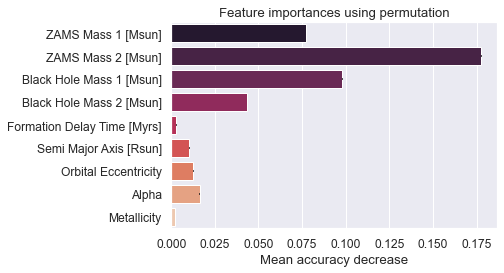

In [119]:
plot_feat_permutation_importances(rfc,X_test,y_test)

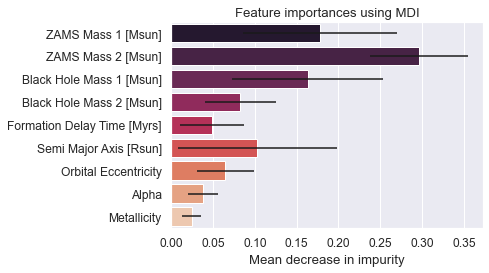

In [120]:
plot_feat_mdi(rfc,X_test,y_test)

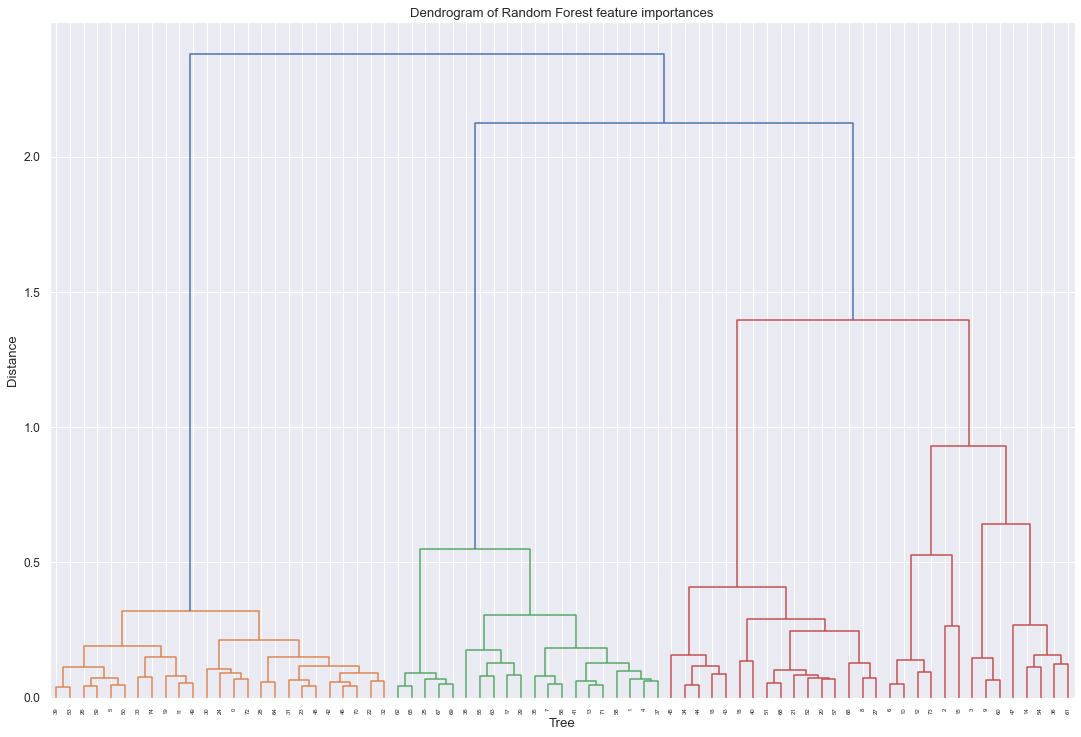

In [98]:
plot_dendrogram(rfc)

### Neural Network

In [121]:
mlp = MLPClassifier(hidden_layer_sizes=(7), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.01,
                    batch_size= 10, 
                    learning_rate='adaptive', 
                    learning_rate_init=1e-05, 
                    #beta_1
                    #beta_2
                    #epsilon
                    max_iter=20,
                    tol=0.00001, 
                    verbose=1,
                    early_stopping=True,
                    n_iter_no_change=3 )


In [122]:
mlp.fit(X_train,y_train)
clear_output()
print('Neural Net score on normalized train set:',round(mlp.score(X_train,y_train)*100,3),'%')
print('Neural Net score on normalized test set:',round(mlp.score(X_test,y_test)*100,3),'%')



Neural Net score on normalized train set: 97.025 %
Neural Net score on normalized test set: 97.015 %


Text(0, 0.5, 'Loss/Accuracy')

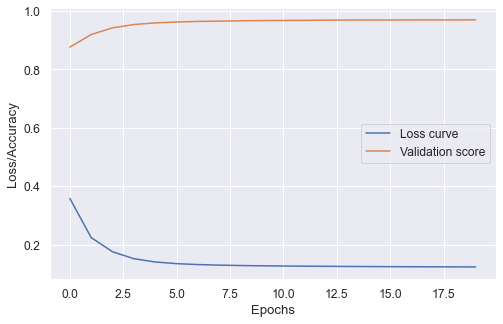

In [123]:
# Plots of the Loss curve and the Validation score measured in Accuracy(score).

fig, ax = plt.subplots(1,1, figsize=(8, 5))

sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.loss_curve_, ax=ax, palette='icefire',label='Loss curve')
sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.validation_scores_, ax=ax, palette='icefire', label='Validation score')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

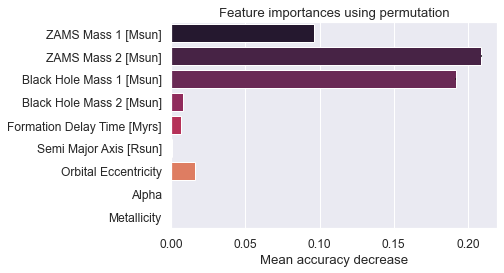

In [124]:
plot_feat_permutation_importances(mlp,X_test,y_test)

Exact explainer: 10001it [01:16, 112.64it/s]                          


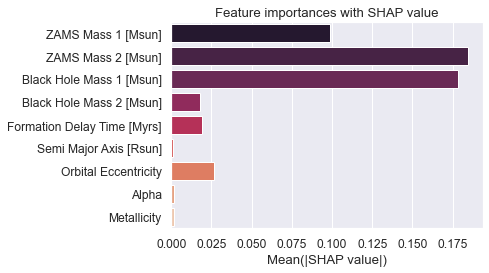

In [125]:
plot_shap(mlp,X_test)